In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_normal = pd.read_csv('./data/normal_training.csv')

In [3]:
test_faulty = pd.read_csv('./data/faulty_testing.csv')

In [4]:
import numpy as np
import sklearn.decomposition
import sklearn.preprocessing

In [5]:
df_train = train_normal[train_normal.simulationRun==1].iloc[:,3:]

In [6]:
df_train

,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,xmeas_10,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,74.863,120.41,0.33818,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,75.000,120.41,0.33620,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,74.771,120.42,0.33563,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,75.224,120.39,0.33553,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,75.388,120.39,0.32632,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.24602,3651.9,4504.4,9.4721,26.600,42.312,2707.2,74.623,120.40,0.32381,...,54.132,23.663,59.588,22.481,38.952,33.489,45.203,49.900,41.057,16.448
496,0.23457,3663.0,4529.5,9.3440,26.872,42.434,2704.1,75.123,120.40,0.35454,...,54.028,22.776,60.566,22.237,42.978,38.017,42.637,50.075,41.339,17.435
497,0.23068,3656.4,4493.0,9.2978,26.920,42.536,2700.3,74.942,120.39,0.35859,...,54.465,23.158,62.102,21.639,42.483,41.016,46.782,50.098,41.277,18.315
498,0.24263,3632.5,4521.5,9.3915,26.956,42.317,2701.9,74.900,120.37,0.34057,...,54.532,23.386,63.164,22.661,39.558,37.892,47.468,50.312,40.557,19.198


In [7]:
df_validation = train_normal[(train_normal.simulationRun>1)&(train_normal.simulationRun<5)].iloc[:,3:]

In [8]:
df_validation

,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,xmeas_10,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
500,0.25225,3683.6,4499.5,9.3306,26.713,42.420,2706.4,76.095,120.43,0.34043,...,54.098,24.474,62.513,22.178,39.661,42.864,46.936,47.381,41.427,15.683
501,0.25152,3652.7,4525.4,9.4291,27.060,41.890,2706.0,75.148,120.43,0.33673,...,53.788,24.545,60.970,22.330,40.111,35.144,48.475,47.491,41.424,20.233
502,0.24869,3650.6,4521.8,9.3850,26.916,42.299,2704.9,75.640,120.40,0.33590,...,53.830,24.832,62.244,22.113,40.211,35.244,45.472,47.585,41.398,18.516
503,0.25210,3669.4,4524.2,9.2763,26.979,42.034,2705.6,74.454,120.39,0.33934,...,53.801,24.496,60.941,22.329,39.792,37.231,46.608,47.459,40.662,17.868
504,0.24039,3660.0,4581.0,9.3955,26.895,42.069,2705.4,73.793,120.42,0.34180,...,54.370,23.190,61.190,22.321,40.162,38.833,45.716,47.556,41.222,17.939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.24153,3678.3,4532.8,9.2400,27.022,42.365,2703.7,74.885,120.39,0.32932,...,53.459,23.628,62.079,22.214,39.252,41.955,46.059,53.399,41.790,16.565
1996,0.25735,3628.5,4494.0,9.3872,26.858,42.919,2702.5,75.264,120.40,0.32570,...,53.804,25.416,60.757,22.195,38.972,35.681,48.197,53.469,42.077,18.036
1997,0.25615,3664.9,4501.0,9.4664,26.753,42.237,2702.9,75.219,120.38,0.32775,...,53.720,25.535,60.638,22.344,38.722,38.603,48.664,53.539,41.436,17.440
1998,0.27981,3719.8,4536.4,9.3278,26.881,42.368,2703.7,75.760,120.42,0.32356,...,52.916,27.283,63.917,22.143,38.365,34.079,49.808,53.310,41.883,18.414


In [9]:
df_test = train_normal[(train_normal.simulationRun>5)&(train_normal.simulationRun<10)].iloc[:,3:]

In [10]:
df_test

,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,xmeas_10,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
2500,0.25025,3676.1,4518.7,9.3769,26.748,42.130,2704.3,75.375,120.42,0.33850,...,53.867,24.670,62.322,22.375,39.896,36.040,47.321,47.384,41.161,15.931
2501,0.25331,3639.9,4487.0,9.3852,27.153,42.877,2704.6,74.702,120.37,0.33614,...,54.247,24.370,59.331,22.425,40.183,38.570,51.266,47.403,40.431,15.211
2502,0.25096,3667.0,4481.4,9.3008,26.742,42.349,2706.5,76.107,120.41,0.33515,...,54.313,24.608,60.264,22.032,40.303,40.878,52.589,47.485,42.107,19.123
2503,0.24879,3676.8,4536.7,9.3483,26.752,42.211,2706.3,75.858,120.38,0.33705,...,53.651,24.822,61.995,22.102,40.071,40.130,40.554,47.630,41.308,18.192
2504,0.23790,3652.6,4492.4,9.2783,27.071,42.767,2704.7,74.040,120.41,0.32679,...,53.430,23.416,60.937,22.235,38.458,39.328,43.594,47.543,41.020,19.733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,0.25459,3634.3,4516.0,9.3821,27.188,42.147,2699.1,75.079,120.38,0.33340,...,53.541,24.960,62.944,21.999,39.712,39.193,46.599,51.053,40.934,18.222
4496,0.30774,3680.5,4550.4,9.4067,26.580,42.343,2701.6,74.804,120.41,0.34760,...,54.159,30.222,60.442,21.299,41.054,34.797,44.424,51.023,41.637,15.749
4497,0.30668,3658.2,4499.5,9.5527,27.114,42.668,2701.8,75.202,120.40,0.34503,...,54.768,30.327,59.422,21.287,41.368,40.995,49.441,51.098,40.529,18.740
4498,0.25490,3687.9,4538.2,9.4584,26.865,42.626,2702.6,75.291,120.44,0.33817,...,54.157,25.156,60.917,21.774,40.047,42.966,45.534,51.376,41.540,15.864


In [11]:
class ModelFastICA:

    # spe: squared prediction errors
    def spe (self, X, X_pred): 
        return np.sum((X-X_pred)**2, axis=1)
   
    def train(self, df_train, n_components=0):
        
        self.mu_train = df_train.mean(axis=0)
        self.std_train = df_train.std(axis=0)
        
        # Simply set n_components to be float, and it will be used as a 
        # lower bound of explained variance.
        
        self.m = sklearn.decomposition.FastICA()
        
        X_train = sklearn.preprocessing.scale(df_train)
        # Transform data back to its original space.
        X_train_pred = self.m.inverse_transform(self.m.fit_transform(X_train)) 
        
        return self.spe(X_train, X_train_pred) # return spe
            
    def test(self, df_test):
        
        # standardizing test data according to the mu and std of training set
        X_test = np.array((df_test-self.mu_train)/self.std_train) 
        X_test_pred = self.m.inverse_transform(self.m.transform(X_test))

        return self.spe(X_test, X_test_pred)

In [12]:
models = {'FastICA': ModelFastICA()}
detection_limits = {}

for name, model in models.items():
    
    spe_train = model.train(df_train)
    spe_validation = model.test(df_validation)
    spe_test = model.test(df_test)
    
    detection_limits[name] = np.percentile(spe_validation, 99.99)
    

FastICA    8.29375
dtype: float64


,IDV(1),IDV(2),IDV(3),IDV(4),IDV(5),IDV(6),IDV(7),IDV(8),IDV(9),IDV(10),IDV(11),IDV(12),IDV(13),IDV(14),IDV(15),IDV(16),IDV(17),IDV(18),IDV(19),IDV(20)
FastICA,37.625,0.0,0.0,0.0,0.0,98.25,0.75,6.875,0.125,0.0,0.0,10.75,1.0,0.0,0.125,0.0,0.0,10.25,0.0,0.125


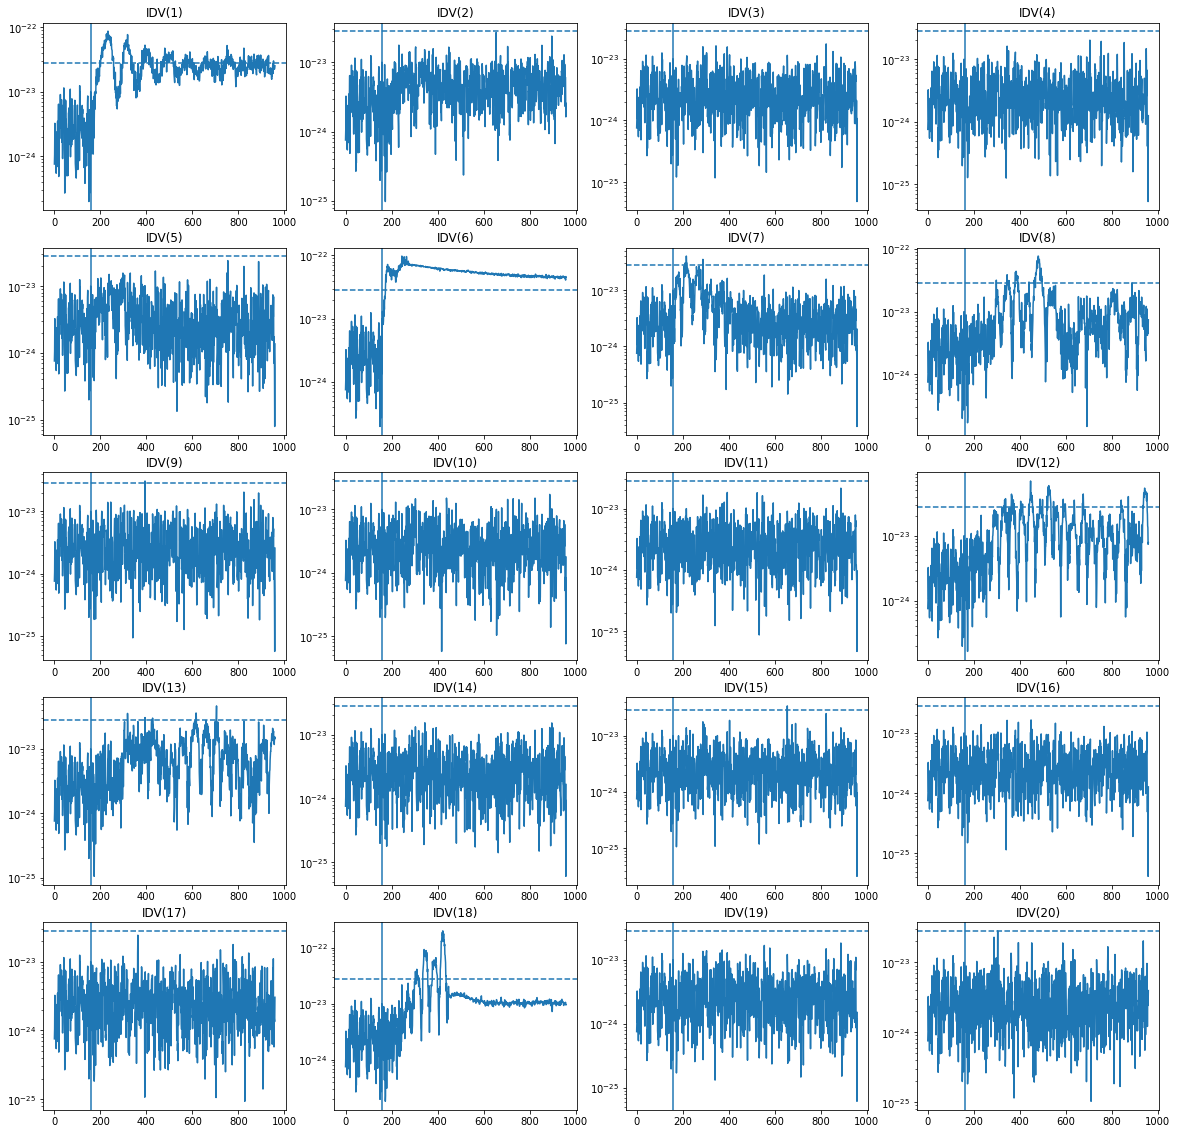

In [13]:
fig, ax = plt.subplots(5,4, figsize = (20, 20))

fdr_df = pd.DataFrame(index=[f'IDV({i})' for i in range(1,21)])

for name, model in models.items():

    spe_test = []
    fdr = []

    for i in range(20):

        df_test = test_faulty[(test_faulty.faultNumber==i+1) & (test_faulty.simulationRun==1)].iloc[:,3:]

        spe_test.append(model.test(df_test)) 
        # will be process with the test model 
        # and will be calculated with this "np.sum((X-X_pred)**2"
        # self.spe(X_test, X_test_pred)

        fault_occurrence = len(spe_test[i])//6

        fdr.append(np.mean(spe_test[i][fault_occurrence:]>detection_limits[name]))

        color = next(ax.ravel()[i]._get_lines.prop_cycler)['color']
        ax.ravel()[i].plot(np.arange(len(spe_test[i])), spe_test[i], color = color)
        ax.ravel()[i].axhline(detection_limits[name], ls='--', color = color)
        ax.ravel()[i].axvline(fault_occurrence)
        ax.ravel()[i].set_title(f'IDV({i+1})')
        ax.ravel()[i].set_yscale('log')
        
    fdr_df[name] = fdr
    
print(100*fdr_df.mean()) # average of the detection error for every type of disturbance   
100*fdr_df.T

## Understand the FDR

In [14]:
# will be the last data test
df_test

,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,xmeas_10,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
18240,0.25171,3672.4,4466.3,9.5122,27.057,42.473,2705.6,74.750,120.41,0.33642,...,54.494,24.527,59.710,22.357,40.149,40.074,47.955,47.300,42.100,15.345
18241,0.25234,3642.2,4568.7,9.4145,26.999,42.586,2705.2,75.126,120.38,0.33801,...,53.269,24.465,60.466,22.413,39.956,36.651,45.038,47.502,40.553,16.063
18242,0.24840,3643.1,4507.5,9.2901,26.927,42.278,2703.5,74.540,120.38,0.33702,...,54.000,24.860,60.642,22.199,40.074,41.868,44.553,47.479,41.341,20.452
18243,0.25153,3628.3,4519.3,9.3347,26.999,42.330,2703.9,74.861,120.38,0.33648,...,53.860,24.553,61.908,21.981,40.141,40.066,48.048,47.440,40.780,17.123
18244,0.21763,3655.8,4571.0,9.3087,26.901,42.402,2707.7,74.380,120.40,0.32114,...,53.307,21.775,61.891,22.412,37.696,38.295,44.678,47.530,41.089,18.681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19195,0.27389,3638.5,4512.7,9.3480,26.764,42.231,2713.2,74.348,120.43,0.31466,...,54.051,26.807,63.206,21.214,36.950,39.891,48.834,49.969,42.244,16.814
19196,0.25405,3656.7,4490.2,9.3897,27.067,42.065,2715.9,74.945,120.40,0.31525,...,54.334,25.185,61.865,21.657,37.441,41.566,50.203,50.270,41.264,17.765
19197,0.25664,3645.5,4506.3,9.4222,26.647,42.139,2715.5,74.313,120.41,0.31779,...,54.141,24.931,63.582,20.960,37.131,36.523,42.912,50.497,41.720,20.372
19198,0.21993,3686.1,4507.0,9.3934,26.625,42.214,2710.9,74.022,120.40,0.32622,...,53.535,21.874,61.885,20.723,38.850,42.909,47.052,50.774,40.902,20.166


In [15]:
# the first dataFrame test in the idv
test_faulty[(test_faulty.faultNumber==0+1) & (test_faulty.simulationRun==1)].iloc[:,3:]

,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,xmeas_10,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.25171,3672.4,4466.3,9.5122,27.057,42.473,2705.6,74.750,120.41,0.33642,...,54.494,24.527,59.710,22.357,40.149,40.074,47.955,47.300,42.100,15.345
1,0.25234,3642.2,4568.7,9.4145,26.999,42.586,2705.2,75.126,120.38,0.33801,...,53.269,24.465,60.466,22.413,39.956,36.651,45.038,47.502,40.553,16.063
2,0.24840,3643.1,4507.5,9.2901,26.927,42.278,2703.5,74.540,120.38,0.33702,...,54.000,24.860,60.642,22.199,40.074,41.868,44.553,47.479,41.341,20.452
3,0.25153,3628.3,4519.3,9.3347,26.999,42.330,2703.9,74.861,120.38,0.33648,...,53.860,24.553,61.908,21.981,40.141,40.066,48.048,47.440,40.780,17.123
4,0.21763,3655.8,4571.0,9.3087,26.901,42.402,2707.7,74.380,120.40,0.32114,...,53.307,21.775,61.891,22.412,37.696,38.295,44.678,47.530,41.089,18.681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,0.76214,3649.5,4479.5,8.8272,26.563,42.412,2702.9,74.181,120.39,0.31029,...,54.346,74.887,58.162,21.859,36.686,37.522,48.566,50.351,40.058,18.792
956,0.75144,3662.9,4465.5,8.6673,27.204,41.964,2702.3,75.758,120.41,0.29906,...,53.973,73.961,58.378,21.820,36.383,35.253,47.244,50.327,41.513,18.474
957,0.75065,3635.6,4492.8,9.0139,26.893,42.426,2701.0,74.483,120.38,0.30178,...,53.647,74.039,54.571,21.798,36.050,36.720,45.820,50.391,40.501,20.892
958,0.75902,3654.7,4473.7,8.8227,26.982,42.352,2699.0,74.497,120.37,0.32089,...,53.313,74.844,55.660,21.552,37.799,38.576,46.245,50.032,40.240,19.911


In [16]:
# the second dataFrame test in the idv
test_faulty[(test_faulty.faultNumber==1+1) & (test_faulty.simulationRun==1)].iloc[:,3:]

,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,xmeas_10,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
960,0.25171,3672.4,4466.3,9.5122,27.057,42.473,2705.6,74.750,120.41,0.33642,...,54.494,24.527,59.710,22.357,40.149,40.074,47.955,47.300,42.100,15.345
961,0.25234,3642.2,4568.7,9.4145,26.999,42.586,2705.2,75.126,120.38,0.33801,...,53.269,24.465,60.466,22.413,39.956,36.651,45.038,47.502,40.553,16.063
962,0.24840,3643.1,4507.5,9.2901,26.927,42.278,2703.5,74.540,120.38,0.33702,...,54.000,24.860,60.642,22.199,40.074,41.868,44.553,47.479,41.341,20.452
963,0.25153,3628.3,4519.3,9.3347,26.999,42.330,2703.9,74.861,120.38,0.33648,...,53.860,24.553,61.908,21.981,40.141,40.066,48.048,47.440,40.780,17.123
964,0.21763,3655.8,4571.0,9.3087,26.901,42.402,2707.7,74.380,120.40,0.32114,...,53.307,21.775,61.891,22.412,37.696,38.295,44.678,47.530,41.089,18.681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,0.27533,3687.1,4650.6,9.6646,26.563,42.779,2696.0,74.149,120.39,0.68524,...,56.393,27.001,63.654,21.213,81.476,36.972,48.620,17.378,40.574,17.562
1916,0.26447,3700.6,4637.3,9.5036,27.203,42.333,2695.6,75.734,120.41,0.67389,...,56.030,26.057,63.862,21.172,81.164,34.690,47.275,17.306,42.010,17.269
1917,0.26368,3673.2,4664.6,9.8490,26.892,42.796,2694.1,74.468,120.38,0.67675,...,55.703,26.135,60.048,21.141,80.815,36.158,45.842,17.343,40.993,19.698
1918,0.27178,3692.4,4646.1,9.6574,26.984,42.721,2692.0,74.484,120.37,0.69581,...,55.377,26.915,61.134,20.903,82.523,38.037,46.287,16.983,40.692,18.699


In [17]:
spe_test

[array([7.55572028e-25, 1.05327042e-24, 3.24478224e-24, 2.00428354e-24,
        1.05705887e-24, 1.26406605e-24, 1.34085912e-24, 5.64762766e-25,
        5.44638021e-25, 1.48571212e-24, 1.32406632e-24, 2.38796492e-24,
        1.61587085e-24, 1.06838939e-24, 3.48392770e-24, 6.91918943e-25,
        1.64590190e-24, 3.03583933e-24, 6.42568172e-24, 4.84850283e-25,
        1.82802039e-24, 6.04748716e-24, 4.58965108e-24, 1.87870052e-24,
        4.90162550e-24, 4.54937069e-24, 9.07602797e-24, 4.66740927e-24,
        3.54804483e-24, 2.74424690e-24, 3.73909604e-24, 7.55165261e-24,
        1.64817239e-24, 3.01364656e-24, 6.14525009e-24, 9.44178056e-25,
        9.19889971e-25, 1.32582488e-24, 4.78464878e-24, 2.41895826e-24,
        3.46998937e-24, 1.14989680e-23, 2.50915021e-24, 2.91973923e-24,
        7.70874712e-24, 2.68123986e-25, 8.10809271e-25, 3.53130899e-25,
        7.58059988e-25, 7.34033439e-24, 1.18850858e-24, 3.72694000e-24,
        3.10469769e-24, 1.98377367e-24, 2.70147833e-24, 4.945832

In [18]:
len(spe_test)
# each spe_test represent each faulty and
# it has 800 test for each faulty

20

In [19]:
fdr
# so base on the experiment bellow we can get 
# that, there 21 fdr that represent each 
# faulty condition detection 

[0.37625,
 0.0,
 0.0,
 0.0,
 0.0,
 0.9825,
 0.0075,
 0.06875,
 0.00125,
 0.0,
 0.0,
 0.1075,
 0.01,
 0.0,
 0.00125,
 0.0,
 0.0,
 0.1025,
 0.0,
 0.00125]

In [20]:
fault_occurrence
# why the value is 160 ???
# so from other source 
# "Introduction and Application in the Process Industry" 
# we can see that the faulty condition are starting from 160
# 

160

In [21]:
# sample for IDV 1
spe_test[0][fault_occurrence:]

array([1.15022508e-24, 1.65428150e-24, 2.38101643e-24, 1.08985580e-24,
       2.08371254e-24, 2.11641837e-24, 7.23850813e-24, 2.48108984e-24,
       3.81913073e-24, 1.08168262e-24, 6.35335735e-24, 8.46910537e-24,
       1.91363757e-24, 2.92051486e-24, 5.57784159e-24, 9.79772969e-24,
       6.53237010e-24, 5.39200532e-24, 1.02088309e-23, 1.00422168e-23,
       9.39651002e-24, 1.69154446e-23, 1.34550936e-23, 2.25103249e-23,
       1.29743422e-23, 1.28915948e-23, 1.33591297e-23, 1.34733337e-23,
       1.85791402e-23, 2.33531517e-23, 1.80495109e-23, 2.05076261e-23,
       1.44174671e-23, 1.55114504e-23, 1.94247975e-23, 1.86583118e-23,
       1.73866554e-23, 2.52208754e-23, 2.60284141e-23, 3.06900465e-23,
       2.46646251e-23, 2.90673120e-23, 3.43781823e-23, 3.66440021e-23,
       3.27377933e-23, 4.05464757e-23, 4.32255058e-23, 3.58787582e-23,
       4.93385847e-23, 3.44102898e-23, 4.55959527e-23, 4.88167053e-23,
       4.78958074e-23, 4.44165615e-23, 5.45481084e-23, 5.37453017e-23,
      

In [22]:
# sample for IDV 1
len(spe_test[0][fault_occurrence:])

800

In [23]:
detection_limits['FastICA']

2.812463273644362e-23

In [24]:
# sample for IDV 1
spe_test[0][fault_occurrence:] > detection_limits['FastICA']
# if the spe_fault occurance are lower than the detction_limits
# which mean we

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [25]:
len(spe_test[0][fault_occurrence:] > detection_limits['FastICA'])

800

In [26]:
np.mean(spe_test[0][fault_occurrence:]>detection_limits['FastICA'])

0.37625